# Task Work: EDA

Let's first load the data and convert the X and Y from the qos_curves.csv to a `list[int]`.

In [1]:
import pandas as pd
import ast

qos_data_df = pd.read_csv("raw_data/qos_data.csv")
qos_curves_df = pd.read_csv("raw_data/qos_curves.csv")
qos_curves_df['X'] = qos_curves_df['X'].apply(ast.literal_eval)
qos_curves_df['Y'] = qos_curves_df['Y'].apply(ast.literal_eval)

## Check Data

In [2]:
qos_data_df.head()

,DATE,LOCATION,PRODUCT,INVENTORY_CURVE_ID,CONSUMPTION_PROFILE_CURVE_ID
0,19.06.2023,Innovation Hill Federated,Spicy Kale Soup,934,1649
1,20.06.2023,Innovation Hill Federated,Spicy Kale Soup,934,1649
2,21.06.2023,Innovation Hill Federated,Spicy Kale Soup,934,1649
3,22.06.2023,Innovation Hill Federated,Spicy Kale Soup,934,1649
4,23.06.2023,Innovation Hill Federated,Spicy Kale Soup,934,1649


In [3]:
qos_curves_df.head()

,CURVE_ID,CURVE_TYPE,WEEK_START,X,Y
0,1804,inventory,19.06.2023,"[0, 319, 320, 1439, 1440, 2173, 2174, 2879, 28...","[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, ..."
1,983,inventory,19.06.2023,"[0, 319, 320, 1439, 1440, 2879, 2880, 4319, 43...","[0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, ..."
2,335,inventory,19.06.2023,"[0, 319, 320, 724, 725, 1439, 1440, 2175, 2176...","[0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, ..."
3,935,inventory,19.06.2023,"[0, 319, 320, 722, 723, 1439, 1440, 2879, 2880...","[0, 0, 3, 3, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, ..."
4,1776,inventory,19.06.2023,"[0, 319, 320, 1439, 1440, 2879, 2880, 3790, 37...","[0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, ..."


In [4]:
qos_curves_df["X"].describe()

count                                                  2021
unique                                                 1930
top       [0, 704, 705, 1439, 1440, 2879, 2880, 4319, 43...
freq                                                     16
Name: X, dtype: object

In [5]:
qos_curves_df["Y"].describe()

count                                                  2021
unique                                                 1393
top       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, ...
freq                                                     55
Name: Y, dtype: object

In [6]:
qos_data_df['PRODUCT'].unique()

array(['Spicy Kale Soup', 'Crispy Chicken Tacos',
       'Crispy Chocolate Stir-Fry', 'Spicy Avocado Burger',
       'Exotic Kale Pasta', 'Zesty Avocado Pizza',
       'Delicious Salmon Burger', 'Crispy Mango Burger',
       'Creamy Chocolate Smoothie', 'Crispy Pasta Cake',
       'Creamy Chocolate Tacos', 'Exotic Avocado Tacos',
       'Sweet Mango Salad', 'Delicious Caramel Burger',
       'Savory Chicken Salad', 'Tasty Blueberry Soup',
       'Zesty Mango Salad', 'Exotic Mango Smoothie', 'Zesty Pasta Pasta',
       'Exotic Chicken Salad', 'Spicy Avocado Smoothie',
       'Savory Blueberry Sushi', 'Creamy Chocolate Salad',
       'Exotic Salmon Cake', 'Sweet Blueberry Soup', 'Spicy Mango Salad',
       'Exotic Avocado Stir-Fry', 'Delicious Salmon Stir-Fry',
       'Crispy Avocado Smoothie', 'Exotic Chicken Cake',
       'Zesty Quinoa Soup', 'Delicious Pasta Soup',
       'Creamy Blueberry Burger', 'Tasty Chocolate Pizza',
       'Spicy Caramel Smoothie', 'Gourmet Pasta Smoothie',
   

In [7]:
qos_data_df['LOCATION'].unique()

array(['Innovation Hill Federated', 'People Medicine Max',
       'Advanced Building', 'Solutions Star Graphics', 'Digital Hill',
       'Venture Power General', 'Electronic Hill Omega', 'Virtual Star',
       'Pacific Consulting Adventure', 'Direct Advanced Digital',
       'Atlantic Software', 'Innovation Net',
       'Adventure Solutions Future', 'Building Research', 'Design Net',
       'Software Studio Max', 'North Contract', 'Provider Power Direct',
       'Technology Architecture', 'Electronic Industries Solutions',
       'Industries Direct', 'Alpha Atlantic Application', 'Net Data Star',
       'Data Vision Innovation', 'Virtual Internet People',
       'Virtual Technology', 'Construction Galaxy Research',
       'Star Digital', 'Direct Pacific', 'Technology Consulting',
       'Systems North Industries', 'Architecture Star Research',
       'Solutions Innovation Vision', 'Network Provider Solutions',
       'Future Galaxy', 'Future Graphics', 'Systems Hill',
       'Pacific P

In [8]:
set(qos_data_df["INVENTORY_CURVE_ID"]).intersection(qos_data_df["CONSUMPTION_PROFILE_CURVE_ID"])

set()

In [9]:
qos_data_df['DATE'].min(), qos_data_df['DATE'].max()

('12.06.2023', '25.06.2023')

In [10]:
qos_curves_df['WEEK_START'].min(), qos_curves_df['WEEK_START'].max()

('12.06.2023', '19.06.2023')

### Merge Product Data and Curves Together

In [11]:
merged_consumption_df = pd.merge(qos_data_df, qos_curves_df, left_on="CONSUMPTION_PROFILE_CURVE_ID", right_on="CURVE_ID")

In [12]:
merged_inventory_df = pd.merge(qos_data_df, qos_curves_df, left_on="INVENTORY_CURVE_ID", right_on="CURVE_ID")

In [13]:
len(merged_consumption_df), len(merged_inventory_df)

(12754, 12754)

## Validate

Let's compute the sum of the area under the consumption profile curve for a week to check that everything is fine.

In [14]:
LOCATION = "Omega Star"

filtered_consumption_df = merged_consumption_df[(merged_consumption_df["LOCATION"] == LOCATION) & (merged_consumption_df["WEEK_START"] == "19.06.2023")]
filtered_consumption_df.head()

,DATE,LOCATION,PRODUCT,INVENTORY_CURVE_ID,CONSUMPTION_PROFILE_CURVE_ID,CURVE_ID,CURVE_TYPE,WEEK_START,X,Y
11571,19.06.2023,Omega Star,Crispy Chicken Tacos,667,1887,1887,consumption_profile,19.06.2023,"[0, 372, 475, 569, 611, 631, 646, 658, 668, 67...","[1.124899994348921e-08, 4.543470207485408e-06,..."
11572,20.06.2023,Omega Star,Crispy Chicken Tacos,667,1887,1887,consumption_profile,19.06.2023,"[0, 372, 475, 569, 611, 631, 646, 658, 668, 67...","[1.124899994348921e-08, 4.543470207485408e-06,..."
11573,21.06.2023,Omega Star,Crispy Chicken Tacos,667,1887,1887,consumption_profile,19.06.2023,"[0, 372, 475, 569, 611, 631, 646, 658, 668, 67...","[1.124899994348921e-08, 4.543470207485408e-06,..."
11574,22.06.2023,Omega Star,Crispy Chicken Tacos,667,1887,1887,consumption_profile,19.06.2023,"[0, 372, 475, 569, 611, 631, 646, 658, 668, 67...","[1.124899994348921e-08, 4.543470207485408e-06,..."
11575,23.06.2023,Omega Star,Crispy Chicken Tacos,667,1887,1887,consumption_profile,19.06.2023,"[0, 372, 475, 569, 611, 631, 646, 658, 668, 67...","[1.124899994348921e-08, 4.543470207485408e-06,..."


In [15]:
PRODUCT = "Crispy Chicken Tacos"

filtered_consumption_df[(filtered_consumption_df["PRODUCT"] == PRODUCT) & (filtered_consumption_df["DATE"] == "19.06.2023")]

,DATE,LOCATION,PRODUCT,INVENTORY_CURVE_ID,CONSUMPTION_PROFILE_CURVE_ID,CURVE_ID,CURVE_TYPE,WEEK_START,X,Y
11571,19.06.2023,Omega Star,Crispy Chicken Tacos,667,1887,1887,consumption_profile,19.06.2023,"[0, 372, 475, 569, 611, 631, 646, 658, 668, 67...","[1.124899994348921e-08, 4.543470207485408e-06,..."


In [16]:
from scipy.interpolate import interp1d
import numpy as np

MINUTES_IN_A_WEEK = 7 * 24 * 60
PRODUCT = "Crispy Chicken Tacos"
ROW_N = 0

filtered_product_consumption_df = filtered_consumption_df[(filtered_consumption_df["PRODUCT"] == PRODUCT) & (filtered_consumption_df["DATE"] == "19.06.2023")]
f_consumption = interp1d(filtered_product_consumption_df['X'].iloc[0], filtered_product_consumption_df['Y'].iloc[0], kind='linear')
week_minutes = np.linspace(0, max(filtered_product_consumption_df.iloc[ROW_N]['X']), num=MINUTES_IN_A_WEEK)
interpolated_consumption = f_consumption(week_minutes)
total_consumption = np.sum(interpolated_consumption) * (week_minutes[1] - week_minutes[0])  # Multiplied by the interval to account for units
total_consumption

1.011151310758122

In [17]:
from datetime import timedelta, datetime

def generate_datetime_range(start, end, num_points):
    total_seconds = int((end - start).total_seconds())
    delta_seconds = total_seconds / (num_points - 1)
    return [start + timedelta(seconds=i * delta_seconds) for i in range(num_points)]

def minutes_to_datetimes(minutes, week_start):
    start_date = datetime.strptime(week_start, '%d.%m.%Y')
    return [start_date + timedelta(minutes=int(minute)) for minute in minutes]

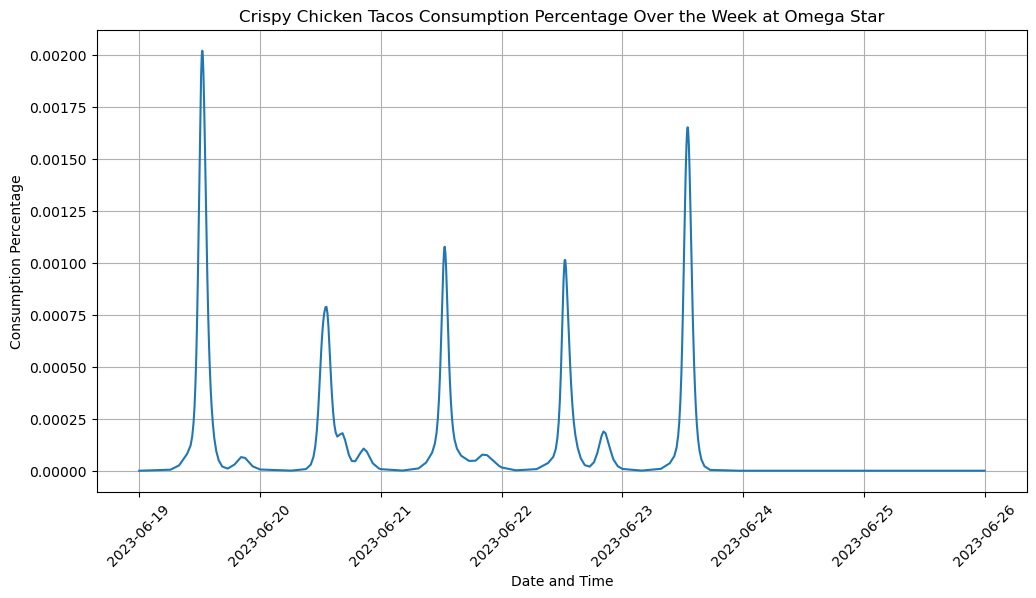

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

converted_x = minutes_to_datetimes(week_minutes, filtered_product_consumption_df['WEEK_START'].iloc[0])
plt.plot(converted_x, interpolated_consumption, label=ROW_N)

plt.xlabel('Date and Time')
plt.ylabel('Consumption Percentage')
plt.title(f'{PRODUCT} Consumption Percentage Over the Week at {LOCATION}')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

We get approximately 1 and the consumption profile seems to make sense. The consumption is highest during lunch-time, and there is some consumption in the evening.

## Computation of the QoS metric
### 1. Compute Inventory Levels over 7 Days for a Location and One Week

In [19]:
LOCATION = "Speed Venture Direct"

filtered_inventory_df = merged_inventory_df[(merged_inventory_df["LOCATION"] == LOCATION) & (merged_inventory_df["WEEK_START"] == "19.06.2023")]
filtered_inventory_df.head()

,DATE,LOCATION,PRODUCT,INVENTORY_CURVE_ID,CONSUMPTION_PROFILE_CURVE_ID,CURVE_ID,CURVE_TYPE,WEEK_START,X,Y
10668,19.06.2023,Speed Venture Direct,Spicy Kale Soup,226,549,226,inventory,19.06.2023,"[0, 532, 533, 803, 804, 1439, 1440, 1952, 1953...","[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ..."
10669,20.06.2023,Speed Venture Direct,Spicy Kale Soup,226,549,226,inventory,19.06.2023,"[0, 532, 533, 803, 804, 1439, 1440, 1952, 1953...","[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ..."
10670,21.06.2023,Speed Venture Direct,Spicy Kale Soup,226,549,226,inventory,19.06.2023,"[0, 532, 533, 803, 804, 1439, 1440, 1952, 1953...","[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ..."
10671,22.06.2023,Speed Venture Direct,Spicy Kale Soup,226,549,226,inventory,19.06.2023,"[0, 532, 533, 803, 804, 1439, 1440, 1952, 1953...","[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ..."
10672,23.06.2023,Speed Venture Direct,Spicy Kale Soup,226,549,226,inventory,19.06.2023,"[0, 532, 533, 803, 804, 1439, 1440, 1952, 1953...","[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ..."


In [20]:
filtered_inventory_sms_df = filtered_inventory_df[(filtered_inventory_df["PRODUCT"] == "Spicy Kale Soup")]


X = []
Y = []
for i, row in filtered_inventory_sms_df.iterrows():
    
    if not Y:
        X = row['X']
        Y = row['Y']
    else:
        np.testing.assert_array_equal(np.array(X), np.array(row['X']))
        np.testing.assert_array_equal(np.array(Y), np.array(row['Y']))

In [21]:
unique_products_df = filtered_inventory_df.drop_duplicates(subset=['PRODUCT'])
unique_products_df.head()

,DATE,LOCATION,PRODUCT,INVENTORY_CURVE_ID,CONSUMPTION_PROFILE_CURVE_ID,CURVE_ID,CURVE_TYPE,WEEK_START,X,Y
10668,19.06.2023,Speed Venture Direct,Spicy Kale Soup,226,549,226,inventory,19.06.2023,"[0, 532, 533, 803, 804, 1439, 1440, 1952, 1953...","[0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ..."
10675,19.06.2023,Speed Venture Direct,Crispy Chicken Tacos,1154,549,1154,inventory,19.06.2023,"[0, 532, 533, 1439, 1440, 2879, 2880, 3642, 36...","[0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, ..."
10682,19.06.2023,Speed Venture Direct,Crispy Chocolate Stir-Fry,1640,549,1640,inventory,19.06.2023,"[0, 532, 533, 1439, 1440, 2042, 2043, 2879, 28...","[0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, ..."
10689,19.06.2023,Speed Venture Direct,Spicy Avocado Burger,1361,549,1361,inventory,19.06.2023,"[0, 532, 533, 683, 684, 1439, 1440, 1952, 1953...","[0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, ..."
10696,19.06.2023,Speed Venture Direct,Exotic Kale Pasta,1414,549,1414,inventory,19.06.2023,"[0, 532, 533, 553, 554, 562, 563, 759, 760, 14...","[0, 0, 3, 3, 2, 2, 1, 1, 0, 0, 0, 0, 3, 3, 3, ..."


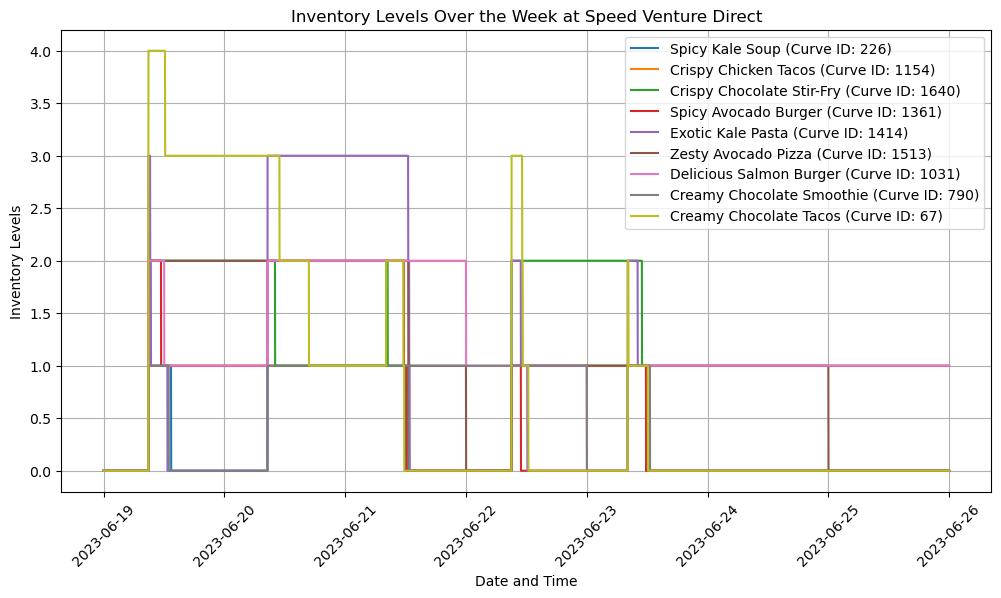

In [22]:
plt.figure(figsize=(12, 6))

for i, row in unique_products_df.iterrows():
    converted_x = minutes_to_datetimes(row["X"], row["WEEK_START"])
    x_range = generate_datetime_range(converted_x[0], converted_x[-1], num_points=60*24*7)

    timestamps = [dt.timestamp() for dt in converted_x]
    f = interp1d(timestamps, row["Y"], kind='linear')
    y_new = f([dt.timestamp() for dt in x_range])

    plt.plot(x_range, y_new, label=f"""{row["PRODUCT"]} (Curve ID: {str(row["CURVE_ID"])})""")

plt.xlabel('Date and Time')
plt.ylabel('Inventory Levels')
plt.title(f'Inventory Levels Over the Week at {LOCATION}')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

### 2. Compute the Product Availability Ratio

$product\_availability\_ratio_t = \frac{n\_available_t}{n\_products_t}$

A product is considered "available" if its inventory level is greater than zero at time $t$.

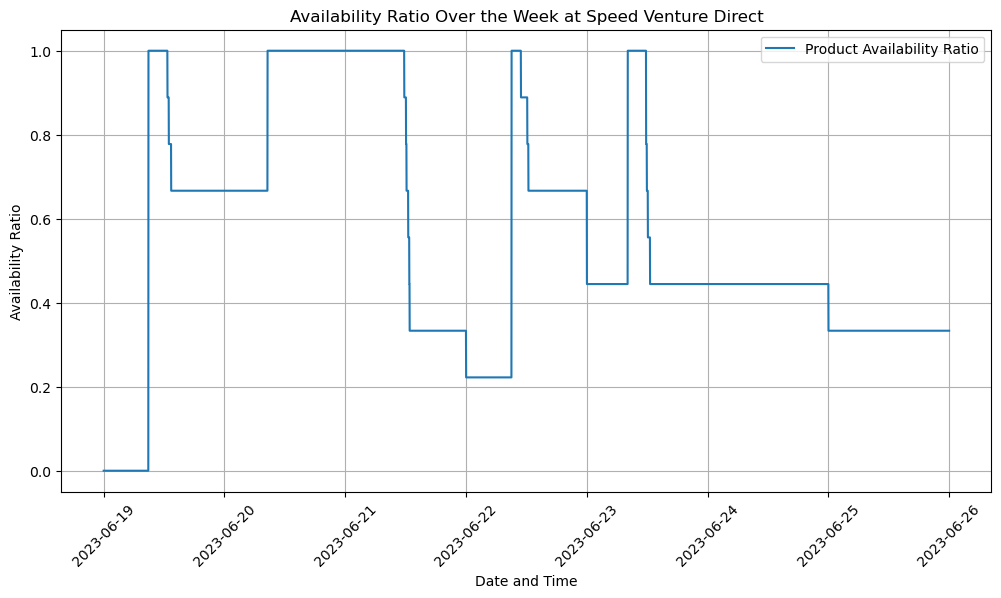

In [23]:
availability_counts = {}
total_product_counts = {}

for i, row in unique_products_df.iterrows():
    converted_x = minutes_to_datetimes(row["X"], row["WEEK_START"])
    x_range = generate_datetime_range(converted_x[0], converted_x[-1], num_points=MINUTES_IN_A_WEEK)
    f = interp1d([dt.timestamp() for dt in converted_x], row["Y"], kind='linear')
    y_new = f([dt.timestamp() for dt in x_range])

    for j, time_instant in enumerate(x_range):
        timestamp = time_instant.timestamp()
        inventory_level = y_new[j]

        if timestamp not in availability_counts:
            availability_counts[timestamp] = 0
            total_product_counts[timestamp] = 0

        if inventory_level > 0:
            # Product is available
            availability_counts[timestamp] += 1

        total_product_counts[timestamp] += 1

# Calculate the availability ratio
availability_ratio = {
    timestamp: availability_counts[timestamp] / total_product_counts[timestamp] 
                      for timestamp in availability_counts
}

availability_ratio_list = sorted(availability_ratio.items())
timestamps, location_availability_ratio = zip(*availability_ratio_list)
plot_timestamps = [datetime.fromtimestamp(ts) for ts in timestamps]

plt.figure(figsize=(12, 6))
plt.plot(plot_timestamps, location_availability_ratio, label="Product Availability Ratio")
plt.xlabel('Date and Time')
plt.ylabel('Availability Ratio')
plt.title(f'Availability Ratio Over the Week at {LOCATION}')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## 3. Compare the Product Availability Ratio with Consumption Profile for the Given Location

In [24]:
unique_consumptions_df = filtered_consumption_df.drop_duplicates(subset=['PRODUCT'])
unique_consumptions_df['CONSUMPTION_PROFILE_CURVE_ID']

11571    1887
11578    1887
11585    1887
11592    1887
11599    1887
11606    1887
Name: CONSUMPTION_PROFILE_CURVE_ID, dtype: int64

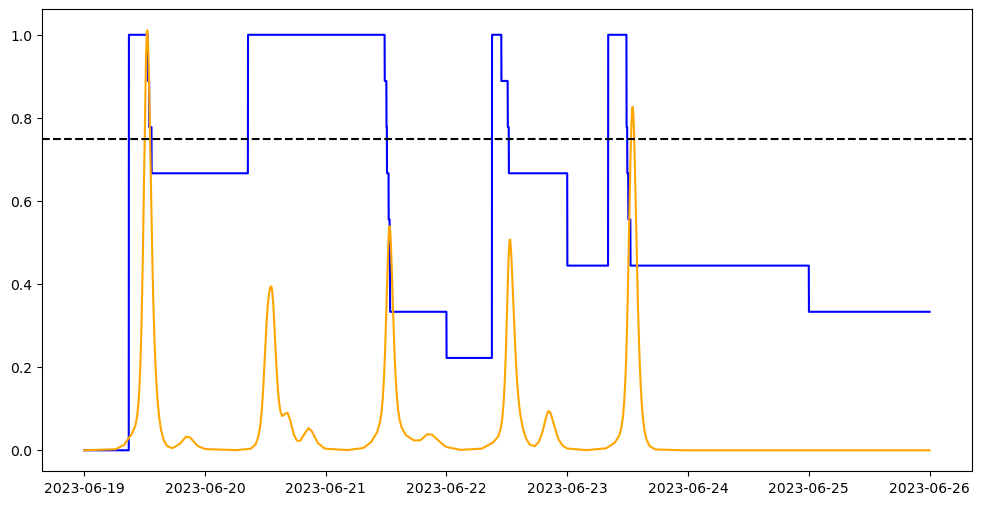

In [25]:
MINUTES_IN_A_WEEK = 7 * 24 * 60

filtered_product_consumption_df = filtered_consumption_df[(filtered_consumption_df["PRODUCT"] == PRODUCT) & (filtered_consumption_df["DATE"] == "19.06.2023")]
f_consumption = interp1d(filtered_product_consumption_df['X'].iloc[0], filtered_product_consumption_df['Y'].iloc[0], kind='linear')
week_minutes = np.linspace(0, max(filtered_product_consumption_df.iloc[ROW_N]['X']), num=MINUTES_IN_A_WEEK)
interpolated_consumption = f_consumption(week_minutes)

timestamps, location_availability_ratio = zip(*availability_ratio_list)
plot_timestamps = [datetime.fromtimestamp(ts) for ts in timestamps]

plt.figure(figsize=(12, 6))
plt.plot(plot_timestamps, location_availability_ratio, label="Product Availability Ratio", color='blue')
plt.plot(plot_timestamps, interpolated_consumption*500, label="Consumption Profile", color='orange')
plt.axhline(y=0.75, color='black', linestyle='--', label="QoS 75% Threshold")

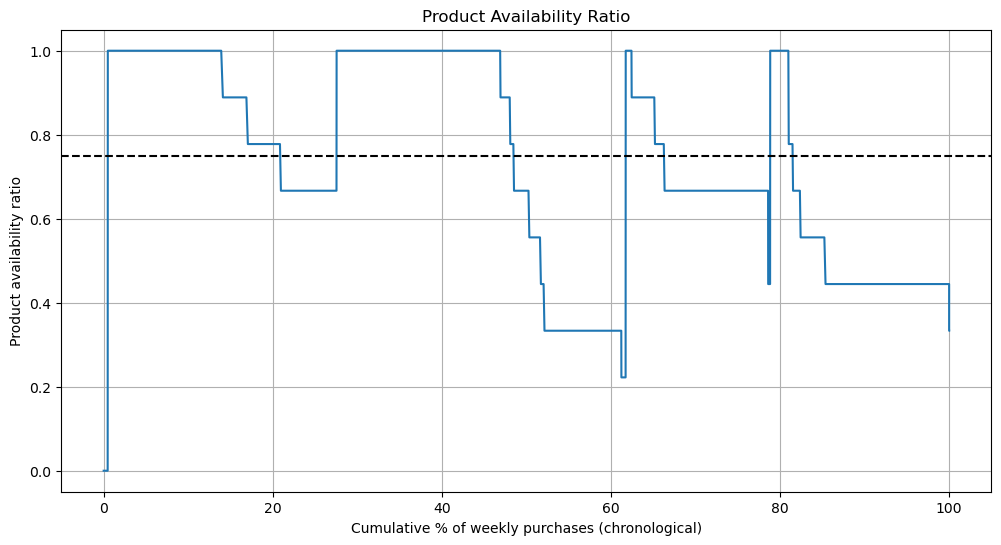

In [26]:
new_timestamps = np.linspace(timestamps[0], timestamps[-1], len(timestamps))
availability_interp_func = interp1d(timestamps, list(availability_ratio.values()), bounds_error=False, fill_value="extrapolate")
adjusted_availability_data = availability_interp_func(new_timestamps)
consumption_profile_cumulative = np.cumsum(interpolated_consumption) / np.sum(interpolated_consumption)

plt.figure(figsize=(12, 6))
plt.plot(consumption_profile_cumulative * 100, adjusted_availability_data)
plt.axhline(y=0.75, color='black', linestyle='--', label="QoS 75% Threshold")
plt.xlabel('Cumulative % of weekly purchases (chronological)')
plt.ylabel('Product availability ratio')
plt.title('Product Availability Ratio')
plt.grid(True)
plt.show()

In [27]:
import scipy

area_under_curve_scipy = scipy.integrate.simps(adjusted_availability_data, consumption_profile_cumulative)
area_under_curve_np = np.trapz(adjusted_availability_data, consumption_profile_cumulative)
area_under_curve_scipy, area_under_curve_np

(0.73310465469885, 0.7330470128303171)